In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom, beta

sns.set(rc = {'figure.figsize':(8,4)})

## Practice

We are hired to analyze the performance of a new avocado farm under KayaProduce. This avocado farm has been in operation for 1 year and had some trouble with their quality control. In the first year of production, KayaProduce yielded 14924 avocados, but 2733 avocados were bad (not edible, rotten, pest, etc…). We come back to the farm one month later and learn that KayaProduce yielded 1865 avocados and 596 were bad.

The probability distribution of bad avocados is a binomial distribution because an avocado has two outcomes, good, or bad. In the first year, the probability of an avocado being bad is 0.18312. With 14,924 avocados harvested, this gives us the following probability distribution.

In [3]:
# avocados harvested in year 1
n = 14924
# percentage of bad avocados
p = 0.18312

# probability of k bad avocados out of n avocados with probability p
prob = lambda k: binom.pmf(k, n, p)
vprob = np.vectorize(prob)

trials = np.arange(n+1)
binom_dist = vprob(trials)

/benv/venv/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:69: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


Binomial Distribution with p = 0.0.18312

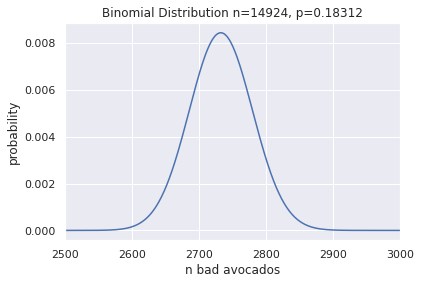

In [3]:
ax = sns.lineplot(x=trials, y=binom_dist);
ax.set(xlabel="n bad avocados", ylabel="probability");
ax.set_title(f"Binomial Distribution n={n}, p={p}");
ax.set(xlim=(2500, 3000));

### Simulation of year ones harvest

These next two cells are a bit random and not relevant for this exercise on prior and posterior probability distributions.

In [4]:
# avocados harvested in year 1
n = 14924
# percentage of bad avocados
p = 0.18312

# 1000 simulations of year 1
data_binom = binom.rvs(n=n, p=p, size=1000)

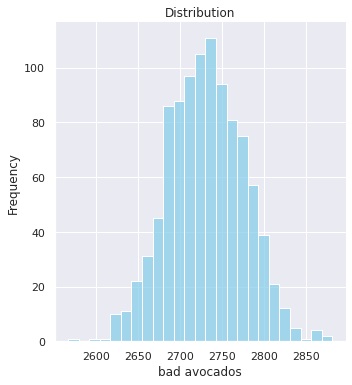

In [5]:
ax = sns.displot(
    data_binom,
    kde=False,
    color='skyblue'
);
ax.set(title="Distribution");
ax.set(xlabel='bad avocados', ylabel='Frequency');

## Prior

The prior here is the probability that our bad avocado probability, $\theta$, is 0.18312. In the first year, 2773 avocados were bad, and 12151 avocados were good, and . We can use a beta distribution as our prior with $\alpha$ = 2773 and $\beta$ = 12151.

### Beta Distribution

In our farm example, we know there are 2773 bad avocados and 12151 good avocados. This gives us the following beta distribution.

In [6]:
# a = bad avocados, b = good avocados
a, b = 2773, 12151
x = np.linspace(beta.ppf(0.0001, a, b), beta.ppf(0.9999, a, b), 100)
y = beta.pdf(x, a, b)

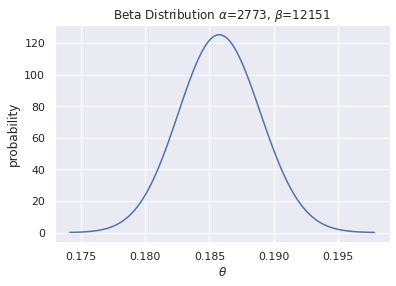

In [7]:
ax = sns.lineplot(x=x, y=y);
ax.set(xlabel=r"$\theta$", ylabel="probability");
ax.set_title(fr"Beta Distribution $\alpha$={a}, $\beta$={b}");

## Posterior

The following month we observe event X, 596 bad avocados and 1269 good avocados. This has its own $\theta$ of about 0.31957. We can use a beta distribution for this $\theta$ as well using $\alpha$ = 596 and $\beta$ = 1269.

In [8]:
# a = bad avocados, b = good avocados
a, b = 596, 1269
x = np.linspace(beta.ppf(0.0001, a, b), beta.ppf(0.9999, a, b), 100)
y = beta.pdf(x, a, b)

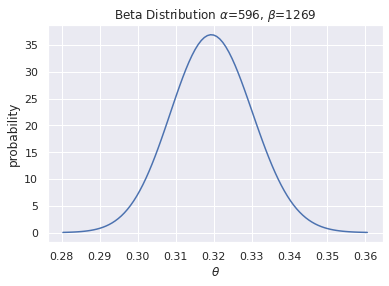

In [9]:
ax = sns.lineplot(x=x, y=y);
ax.set(xlabel=r"$\theta$", ylabel="probability");
ax.set_title(fr"Beta Distribution $\alpha$={a}, $\beta$={b}");

It is known that for a binomail distribution with a beta prior, the posterior probability distribution is also a beta distribution with the following parameters:

$\alpha = \alpha_1 + \alpha_2,$  $\beta = \beta_1 + \beta_2$

Which gives us the following plot for the posterior probability distribution, shown in green

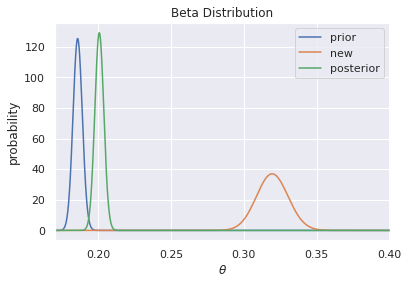

In [10]:
r1 = 0
r2 = 1

res = 10000

# prior
a1, b1 = 2773, 12151
x1 = np.linspace(beta.ppf(r1, a1, b1), beta.ppf(r2, a1, b1), res)
y1 = beta.pdf(x1, a1, b1)

# new observations
a2, b2 = 596, 1269
x2 = np.linspace(beta.ppf(r1, a2, b2), beta.ppf(r2, a2, b2), res)
y2 = beta.pdf(x2, a2, b2)

# posterior
a3, b3 = a1 + a2, b1 + b2
x3 = np.linspace(beta.ppf(r1, a3, b3), beta.ppf(r2, a3, b3), res)
y3 = beta.pdf(x3, a3, b3)

# plot
fig, ax = plt.subplots()
sns.lineplot(x=x1, y=y1, ax=ax, label="prior");
sns.lineplot(x=x2, y=y2, ax=ax, label="new");
sns.lineplot(x=x3, y=y3, ax=ax, label="posterior");
ax.set(xlim=(0.17, 0.4))
ax.set(xlabel=r"$\theta$", ylabel="probability");
ax.set_title(f"Beta Distribution");

## Likelihood

For practice, we should consider the likelihood of this event X given our prior. e.g. P(X | $\theta$)

This is a binomial distribution with n = 1865 and p = 0.18312

In [11]:
# avocados harvested in year 1
n = 1865
# percentage of bad avocados
p = 0.18312

# probability of k bad avocados out of n avocados with probability p
likeli = lambda k: binom.pmf(k, n, p)
vlikeli = np.vectorize(likeli)

trials = np.arange(n+1)
binom_dist = vlikeli(trials)

/benv/venv/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:69: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


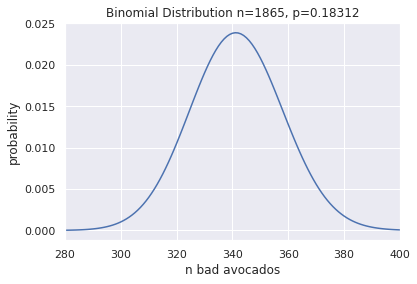

In [12]:
ax = sns.lineplot(x=trials, y=binom_dist);
ax.set(xlabel="n bad avocados", ylabel="probability");
ax.set_title(f"Binomial Distribution n={n}, p={p}");
ax.set(xlim=(280, 400));

The likelihood of picking 596 bad avocados out of 1865 given our prior is:

In [13]:
binom_dist[596]

7.809919076972786e-46

Very small.